In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Diagnosis'] = data.target
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['Diagnosis'])
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [3]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('lr', LogisticRegression(solver='liblinear'))  
])


param_grid = {'lr__C': [0.1, 1, 10]}  
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

C:\Users\Akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


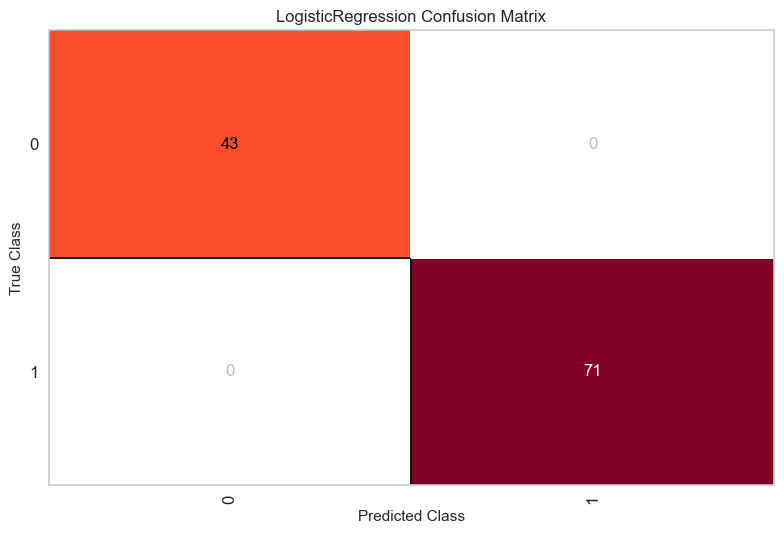

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [4]:
cm = ConfusionMatrix(best_model, classes=le.classes_)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

C:\Users\Akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


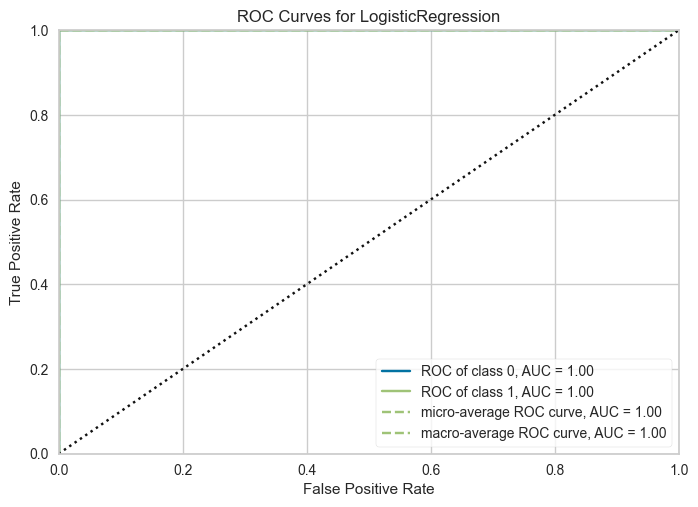

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [5]:
roc_auc = ROCAUC(best_model, classes=le.classes_)
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()
